# Converting ADC data to FFT and numpy array (Baby absent - training)

## ADC data is converted to fft and normalised and converted to numpy array as it is easier for handling large datas

In [1]:
import os
import numpy as np
import pandas as pd
from scipy import fftpack
import matplotlib.pyplot as plt


absent_dir = '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_train/'

# Fetch all the files for baby absent data which will be used for training

file_paths_absent = []

all_files = os.listdir(absent_dir)    
csv_files = list(filter(lambda f: f.endswith('.csv'), all_files))
for i in csv_files:
    file_path = absent_dir + i
    file_paths_absent.append(file_path)
file_paths_absent

['/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_train/adc_4.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_train/BabyWithoutSeat_8.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_train/adc_10.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_train/adc_38.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_train/adc_39.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_train/adc_11.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_train/BabyWithoutSeat_9.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_train/adc_5.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_train/BabyWithoutSeat_10.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_train/adc_no_10000.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBaby_train/BabyWithoutSeat_13.csv',
 '/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/WithoutBa

In [2]:
# Initialize an empty list to store the DataFrames
dfs = []

# Loop through the file paths and append each DataFrame to the list
for file in file_paths_absent:
    df = pd.read_csv(file, header=None, index_col=False)
    dfs.append(df)

# Concatenate all the DataFrames in the list
combined_df_absent = pd.concat(dfs, ignore_index=True)
train_absent_len = len(combined_df_absent)
print(train_absent_len)
combined_df_absent

35678


,0,1,2,3,4,5,6,7,8,9,...,16390,16391,16392,16393,16394,16395,16396,16397,16398,16399
0,64,32768.0,1,1,512,0,1953125,12,0.0,0,...,-167.0,-167.0,-163.0,-163.0,-164.0,-160.0,-149.0,-147.0,-148.0,-147.0
1,64,32768.0,1,1,512,0,1953125,12,0.0,0,...,-137.0,-139.0,-144.0,-142.0,-143.0,-142.0,-140.0,-140.0,-140.0,-143.0
2,64,32768.0,1,1,512,0,1953125,12,0.0,0,...,-136.0,-138.0,-134.0,-133.0,-125.0,-121.0,-125.0,-129.0,-128.0,-122.0
3,64,32768.0,1,1,512,0,1953125,12,0.0,0,...,-170.0,-172.0,-167.0,-163.0,-158.0,-161.0,-163.0,-161.0,-157.0,-155.0
4,64,32768.0,1,1,512,0,1953125,12,0.0,0,...,-151.0,-153.0,-154.0,-155.0,-155.0,-157.0,-156.0,-157.0,-162.0,-167.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35673,64,32768.0,1,1,512,0,1953125,12,0.0,0,...,-141.0,-138.0,-138.0,-141.0,-144.0,-146.0,-151.0,-155.0,-155.0,-159.0
35674,64,32768.0,1,1,512,0,1953125,12,0.0,0,...,-167.0,-163.0,-164.0,-167.0,-170.0,-170.0,-171.0,-171.0,-166.0,-160.0
35675,64,32768.0,1,1,512,0,1953125,12,0.0,0,...,-139.0,-140.0,-144.0,-144.0,-145.0,-146.0,-144.0,-140.0,-142.0,-145.0
35676,64,32768.0,1,1,512,0,1953125,12,0.0,0,...,-162.0,-164.0,-167.0,-167.0,-166.0,-166.0,-166.0,-166.0,-169.0,-171.0


In [3]:
print(f"Length of combined data frame: {len(combined_df_absent)}")

# Get the shape of the DataFrame
shape = combined_df_absent.shape

# Number of rows
num_rows = shape[0]

# Number of columns
num_columns = shape[1]

# Print the number of rows and columns
print("Number of rows baby absent:", num_rows)
print("Number of columns baby absent:", num_columns)

Length of combined data frame: 35678
Number of rows baby absent: 35678
Number of columns baby absent: 16400


In [4]:
# Skip header data and consider only adc data for fft calculation
adc_data_selected_absent = combined_df_absent.iloc[:, 16:].mean(axis=1)
adc_data_selected_absent

0       -153.544312
1       -153.519226
2       -151.780212
3       -158.446533
4       -152.858398
            ...    
35673   -155.241821
35674   -154.166992
35675   -154.103333
35676   -153.723877
35677   -153.986328
Length: 35678, dtype: float64

In [5]:
# Convert the pandas Series to a numpy array
adc_array = adc_data_selected_absent.to_numpy()

# Hanning window is chosen
window = np.hanning(len(adc_array))

# Apply the window function to your data
windowed_adc_data = adc_array * window

# Perform FFT on the windowed data
fft_result = np.fft.fft(windowed_adc_data)

sampling_rate = 16000
n = len(adc_array)
freq = np.fft.fftfreq(n, d=1/sampling_rate)
# Calculate the magnitude and phase of the FFT result
magnitude = np.abs(fft_result)
phase = np.angle(fft_result)

# Create a DataFrame
fft_df = pd.DataFrame({
    'Frequency': freq,
    'FFT Magnitude': magnitude,
    'Phase': phase
})


fft_df

,Frequency,FFT Magnitude,Phase
0,0.000000,2.414926e+06,-3.141593
1,0.448456,1.245733e+06,-0.076811
2,0.896911,2.537369e+05,1.832040
3,1.345367,1.397168e+05,-1.268782
4,1.793823,3.561753e+04,-2.704310
...,...,...,...
35673,-2.242278,6.842157e+04,0.648550
35674,-1.793823,3.561753e+04,2.704310
35675,-1.345367,1.397168e+05,1.268782
35676,-0.896911,2.537369e+05,-1.832040


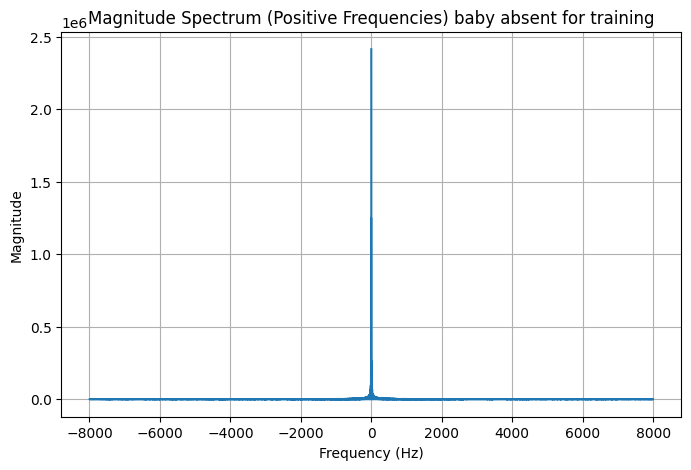

In [6]:
plt.figure(figsize=(8, 5))  # Set the figure size for better readability
plt.plot(fft_df['Frequency'], fft_df['FFT Magnitude'])  # Plot positive frequency vs magnitude
plt.title('Magnitude Spectrum (Positive Frequencies) baby absent for training')  # Title of the plot
plt.xlabel('Frequency (Hz)')  # Label for the x-axis
plt.ylabel('Magnitude')  # Label for the y-axis
plt.grid(True)  # Show grid for better readability
plt.show()  # Display the plot

## Store the data calculated

In [7]:
numpy_array = fft_df.to_numpy()
print(os.getcwd())
# Save the array to a file
np.save((absent_dir+'withoutbaby_train.npy'), numpy_array)

/Users/kushalprakash/Documents/Uni/23-24/AIS+ML/Final/code
